# Receiver Operating Characteristics (ROC)

In classification tasks, the goal is to correctly identify the classes of data points, and the most straightforward metric to assess performance is accuracy — the number of correct predictions divided by the total number of samples. This may seem like a natural and often useful choice.

However, there are many situations where correctly detecting one particular class is significantly more critical than the others. In other words, some types of mistakes are worse than others.

Take fraud detection, for example: finding fraudulent documents is more important than misclassifying a legitimate one. Or consider a medical diagnostic test for cancer:

* If the test incorrectly predicts cancer for a healthy patient (a **false positive**), it may cause stress or lead to extra testing.

* But if the test fails to detect cancer in a patient who actually has it (a **false negative**), the consequences can be devastating — the patient may miss the chance for early treatment, which could be life-saving.

In such cases, accuracy can be misleading, and we need more nuanced metrics that reflect the importance of different kinds of errors.

At this moment, let's make some definitions on the correct/incorrect detections of a binary model with labels $ y \in \{0,1\}$:

* **True Positive (TP):**

  The model correctly predicts a positive case (i.e., predicts 1 when the true label is also 1).

  $$
  \text{TP} = \text{Pr}(\hat{x}=1|x=1)
  $$

  **Example:** A cancer patient is correctly diagnosed as having cancer.

* **False Positive (FP):**

  The model incorrectly predicts a positive case when the true label is negative (predicts 1 when it should be 0).

  $$
  \text{FP} = \text{Pr}(\hat{x}=1|x=0)
  $$

  **Example:** A healthy person is mistakenly diagnosed with cancer.

* **True Negative (TN):**
  The model correctly predicts a negative case (predicts 0 when the true label is 0).

  $$
  \text{TN} = \text{Pr}(\hat{x}=0|x=0)
  $$

  **Example:** A healthy person is correctly diagnosed as not having cancer.

* **False Negative (FN):**
  The model incorrectly predicts a negative case when the true label is positive (predicts 0 when it should be 1).

  $$
  \text{FN} = \text{Pr}(\hat{x}=0|x=1)
  $$

  **Example:** A cancer patient is wrongly diagnosed as healthy.

Also non-binary extensions can be done for these terms but for now let's stick to current definitions. These are critical concepts to understand where true detection cases of TP and TN are always preferred to be as high as possible. When it comes to the false detection cases, however, though they are also preferred to be as low as possible, one case can be more favored over the other because it will have more severe consequences. In diagnosis cases, the FN's are generally more important to be minimized than the FP's for instance.

Now let's make our transition for the classification metrics based on these definitions. First, let's define the good old metric **accuracy** with these new terminology to get a little familiar with them using a better known metric. The accuracy is, as mentioned, the ratio of correct classifications over the total predictions. In our new terminology correct detections correspond to TP and TN's. Thus, accuracy is;

  $$
  \text{accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+\text{FN}}
  $$

The formula is a little tedious but still easy and intuitive to understand. The other metrics will be easier than this. The new metrics are precision, recall and F1 score.

Precision is the ratio of correct true predictions over total true predictions;

  $$
  \text{precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}
  $$

Recall is the ratio of correct true predictions over total number of true classes (not true *predictions* which is the subtle difference from the precision);

  $$
  \text{recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}
  $$

Note that we have FN in the denominator. This is a case which is predicted as negative by the model but it is actually positive in reality.

Another view of these two terms are precision is a measure of "Out of the positive predictions the model made, how many were correct?" and recall is a measure of "Out of all actual positives, how many did I catch?". Thus, one takes into account the model's results while the other the actual occurences. As mentioned, the difference is subtle but important.

A common metric that is used in cases where we want both of these metrics to have a contribution is the F1 score which is the harmonic mean of precision and recall;

  $$
  \text{F1 score} = \frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}} =   \frac{2 \cdot \text{precision} \cdot \text{recall}} {\text{precision} + \text{recall}}
  $$

All these metrics are confined in the limit $[0,1]$ (hence the 2 in the numerator of F1 score), and almost always the upper limit 1 is considered to be the optimum value and the purpose of the algorithms designed.

So far, we've focused on metrics like precision, recall, and F1 score, which rely on choosing a classification threshold to determine whether a prediction is considered positive or negative. However, there's a class of evaluation techniques that look at the model's performance across all possible thresholds — giving a more complete picture of its ranking quality.

One of the most widely used tools for this is the **Receiver Operating Characteristic (ROC)** curve.

The term “receiver” comes from the field of radar signal detection, where operators had to distinguish between incoming enemy signals and background noise. In that context, a:

* Hit corresponds to a correct detection (like a true positive),

* Miss is a failure to detect a true signal (false negative),

* False alarm is detecting something that isn't really there (false positive),

* Correct rejection is correctly ignoring noise (true negative).

And if we discuss the false detection prioritazation in this context, misses are more critical then false alarms because it may end up by being captured by an enemy while false alarms at most mean the extra usage of resources for checking enemy presence but without absence of any real danger.

These concepts naturally evolved into the modern-day TP, FN, FP, TN framework in classification problems. The ROC curve is a graphical representation of this trade-off, showing how the True Positive Rate (TPR) and the False Positive Rate (FPR) vary as the decision threshold changes. These two terms can also be defined as;

  $$
  \text{TPR} = \frac{\text{TP}}{\text{TP}+\text{FN}} = \frac{\text{TP}}{\text{P}} \\
  \text{FPR} = \frac{\text{FP}}{\text{TN}+\text{FP}} = \frac{\text{FP}}{\text{N}}
  $$

Possible ROC curves are given in figures below.

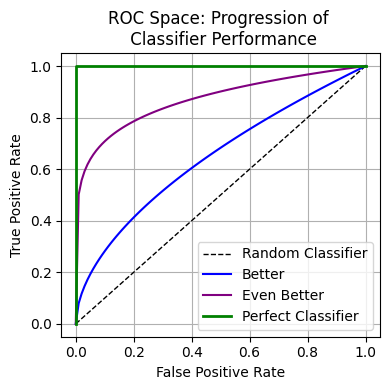

In [8]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Perfect classifier: jumps straight to (0,1)
fpr_perfect = [0, 0, 1]
tpr_perfect = [0, 1, 1]

# Define False Positive Rate (FPR) values for x-axis
fpr = np.linspace(0, 1, 100)

# Random classifier: diagonal
tpr_random = fpr

# Progressively better classifiers (more curved upwards)
tpr_better1 = fpr**0.55       # Moderately better
tpr_better2 = fpr**0.15       # Almost perfect

# Plot the ROC space with classifiers
plt.figure(figsize=(4,4))

# Baseline: random classifier
plt.plot(fpr, tpr_random, '--', color='black', label='Random Classifier', linewidth=1)

# Better classifiers
plt.plot(fpr, tpr_better1, label='Better', color='blue')
plt.plot(fpr, tpr_better2, label='Even Better', color='purple')

# Perfect classifier
plt.plot(fpr_perfect, tpr_perfect, label='Perfect Classifier', color='green', linewidth=2)

# Labels and formatting
plt.xlabel('False Positive Rate (TPR)')
plt.ylabel('True Positive Rate (FPR)')
plt.title('ROC Space: Progression of \n Classifier Performance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Typical ROC curves are shown in the figure. Each line represents a different type of classifier based on the real-valued scores (e.g., probabilities or logits) they produce before any thresholding. A random classifier, which assigns labels purely by chance without using any meaningful data, yields equal true positive rate (TPR) and false positive rate (FPR) at all thresholds — forming the diagonal line.

Any curve below this diagonal corresponds to a model that consistently makes more mistakes than correct decisions for positive cases, and such models are considered worse than random — they are generally not shown. In contrast, a perfect classifier would have TPR = 1 for all FPR values up to 1, resulting in a sharp square corner. In practice, most classifiers lie somewhere between these two extremes.

While we commonly refer to these as "classifiers," what is actually plotted are the continuous outputs (e.g., probabilities) of a model — not the final class labels. These outputs become binary classifications only after applying a threshold.

This is where the ROC curve becomes a powerful tool: each point on the curve corresponds to a different threshold value $\tau$. Rather than looking for a minimum like in typical optimization problems, ROC analysis involves navigating a trade-off: increasing TPR usually comes at the cost of increasing FPR. There is no single “best” point — instead, the goal is to choose a threshold that provides an acceptable balance between catching positives (high TPR) and limiting false alarms (low FPR).

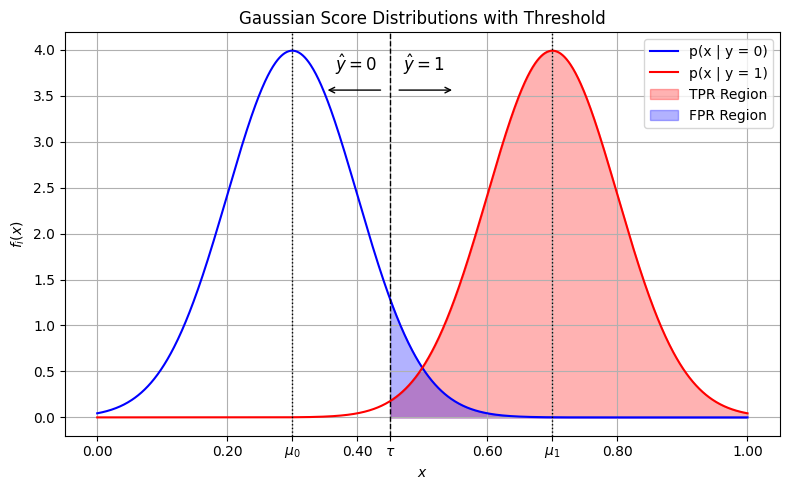

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the two Gaussian distributions
mu0, mu1 = 0.3, 0.7        # Means for class 0 and class 1
sigma = 0.1                # Shared standard deviation
x = np.linspace(0, 1, 1000)

# Probability density functions for each class
pdf0 = norm.pdf(x, mu0, sigma)
pdf1 = norm.pdf(x, mu1, sigma)

# Choose a threshold between the means (not centered)
tau = 0.45

# Define shaded regions: scores classified as class 1 (x >= tau)
x_tpr = x[x >= tau]
x_fpr = x[x >= tau]
tpr_shade = norm.pdf(x_tpr, mu1, sigma)
fpr_shade = norm.pdf(x_fpr, mu0, sigma)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the two class distributions
ax.plot(x, pdf0, label='p(x | y = 0)', color='blue')
ax.plot(x, pdf1, label='p(x | y = 1)', color='red')

# Fill the TPR and FPR areas
ax.fill_between(x_tpr, 0, tpr_shade, color='red', alpha=0.3, label='TPR Region')
ax.fill_between(x_fpr, 0, fpr_shade, color='blue', alpha=0.3, label='FPR Region')

# Add vertical threshold line
ax.axvline(tau, color='black', linestyle='--', linewidth=1)

# Text labels for predicted class
ax.text(tau - 0.02, ax.get_ylim()[1]*0.9, r'$\hat{y} = 0$', fontsize=12, color='black', ha='right')
ax.text(tau + 0.02, ax.get_ylim()[1]*0.9, r'$\hat{y} = 1$', fontsize=12, color='black', ha='left')
# Arrows showing classification direction
ax.annotate('', xy=(tau - 0.10, ax.get_ylim()[1]*0.85), xytext=(tau - 0.01, ax.get_ylim()[1]*0.85),
            arrowprops=dict(arrowstyle='->', color='black'))
ax.annotate('', xy=(tau + 0.10, ax.get_ylim()[1]*0.85), xytext=(tau + 0.01, ax.get_ylim()[1]*0.85),
            arrowprops=dict(arrowstyle='->', color='black'))

# Vertical dashed lines for μ₀ and μ₁
ax.axvline(mu0, color='black', linestyle=':', linewidth=1)
ax.axvline(mu1, color='black', linestyle=':', linewidth=1)


# Tick marks and labels for μ₀ and μ₁
ax.set_xticks(list(ax.get_xticks()) + [mu0, mu1, tau])
ax.set_xticklabels([f'{tick:.2f}' if tick not in [mu0, mu1, tau] else r'$\mu_0$' if tick == mu0 else r'$\mu_1$' if tick==mu1 else r'$\tau$'
                    for tick in ax.get_xticks()])

# Labels and legend
ax.set_title("Gaussian Score Distributions with Threshold")
ax.set_xlabel("$x$")
ax.set_ylabel("$f_i(x)$")
ax.set_xlim([-0.05,1.05])
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


A visual example for the case to generate the ROC is given above. Assume we have two discrete symbols sent as $y\in \{0, 1\}$, and these are corrupted by additive Gaussian noise during transmission. Assume symbols are sent as $x=\mu_0$ and $x=\mu_1$ as analog signals and the variance of the Gaussian noise is $\sigma^2$. Then, we have probability densities for these 2 corrupted signals as;

$$
f_y(x)=\frac{1}{\sqrt{2\pi\sigma^2}} \exp \left({\frac{(x-\mu_y)^2}{2\sigma^2}}\right), \quad y \in \{0, 1\}
$$

Here TPR corresponds to total probability under $f_1$ for $x>\tau$, and FPR corresponds to total probability under $f_0$ for $x>\tau$. This by itself is a visual proof that as TPR increases FPR increases and vice versa. Moreover, they increase as $\tau$ decreases because we get more area under both curves for a small $\tau$. Intuitively this also means predicting more $\hat{y}=1$ values some of them being true and some of them false but both of them more compared to a larger $\tau$ case. The cases for varying $\tau$ values are given in more detail in below plots.

<ipython-input-70-c7b544ea1f11>:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


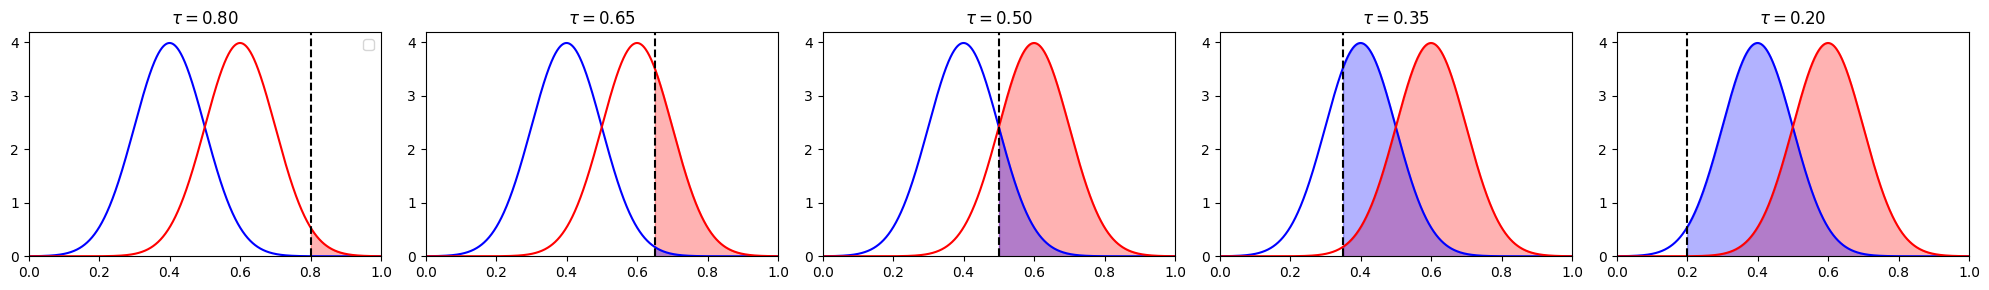

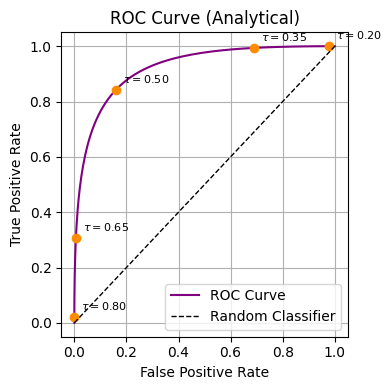

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gaussian parameters
# mu0, mu1 = 0.3, 0.7
mu0, mu1 = 0.4, 0.6
sigma = 0.1
x = np.linspace(0, 1, 1000)

# PDFs
pdf0 = norm.pdf(x, mu0, sigma)
pdf1 = norm.pdf(x, mu1, sigma)

# --- Panel of threshold plots ---
# tau_values_panel = [0.35, 0.4, 0.45, 0.5, 0.55]
# tau_values_panel = [0.1, 0.35, 0.5, 0.65, 0.9]
# tau_values_panel = [0.2, 0.35, 0.5, 0.65, 0.8]
tau_values_panel = [0.8, 0.65, 0.5, 0.35, 0.2]

# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))
axes = axes.flatten()

for i, tau in enumerate(tau_values_panel):
    x_tpr = x[x >= tau]
    x_fpr = x[x >= tau]
    tpr_shade = norm.pdf(x_tpr, mu1, sigma)
    fpr_shade = norm.pdf(x_fpr, mu0, sigma)

    ax = axes[i]
    ax.plot(x, pdf0, color='blue')
    ax.plot(x, pdf1, color='red')
    ax.fill_between(x_tpr, 0, tpr_shade, color='red', alpha=0.3)
    ax.fill_between(x_fpr, 0, fpr_shade, color='blue', alpha=0.3)
    ax.axvline(tau, color='black', linestyle='--')
    ax.set_title(fr'$\tau = {tau:.2f}$')
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    if i == 0:
        ax.legend()

# Hide unused subplot if any
for j in range(len(tau_values_panel), len(axes)):
    axes[j].axis('off')

plt.tight_layout()

# --- ROC Curve ---
tau_values_roc = np.linspace(0, 1, 200)
fpr_vals = 1 - norm.cdf((tau_values_roc - mu0) / sigma)
tpr_vals = 1 - norm.cdf((tau_values_roc - mu1) / sigma)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(fpr_vals, tpr_vals, label='ROC Curve', color='purple')

# Compute TPR and FPR for panel τ values
fpr_points = 1 - norm.cdf((np.array(tau_values_panel) - mu0) / sigma)
tpr_points = 1 - norm.cdf((np.array(tau_values_panel) - mu1) / sigma)

# Plot them on the ROC curve
ax.plot(fpr_points, tpr_points, 'o', color='darkorange')
for i, (fpr, tpr, tau) in enumerate(zip(fpr_points, tpr_points, tau_values_panel)):
    ax.annotate(fr'$\tau={tau:.2f}$', (fpr, tpr), textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

ax.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier', linewidth=1)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve (Analytical)')
ax.legend()
ax.grid(True)
plt.tight_layout()

In the upper plots, we visualize how different threshold values $\tau$ affect classification decisions when using two Gaussian-distributed score outputs — one for class 0 (blue) and one for class 1 (red). The vertical dashed line in each plot represents the threshold used to assign predictions: any value to the right of this threshold is classified as positive $(\hat{y}=1)$. The red shaded region indicates the proportion of class 1 that is correctly classified as positive — this corresponds to the true positive rate (TPR). On the other hand, the blue shaded area to the right of the threshold represents class 0 instances mistakenly classified as positive — this is the false positive rate (FPR).

As we move from left to right across the plots, we decrease the threshold $\tau$, making it easier for a sample to be classified as positive. Consequently, more red samples (true class 1) are captured — so TPR increases. At the same time, more blue samples (true class 0) are mistakenly classified — so FPR also increases. Conversely, when the threshold is high (e.g. $\tau=0.80$), the model is less permissive, resulting in a low TPR but also a low FPR. This clearly illustrates the trade-off: increasing sensitivity (TPR) often comes at the cost of increasing false alarms (FPR).

The bottom plot summarizes this threshold-dependent behavior into a Receiver Operating Characteristic (ROC) curve. Each point on the curve corresponds to a specific threshold, showing the model's TPR and FPR at that point. The orange dots represent the thresholds visualized above, and you can see that as $\tau$ decreases, these points move up and to the right on the ROC curve — just as expected from the earlier observation. The diagonal dashed line represents a random classifier that has no predictive power; our ROC curve sits well above this line, indicating that the classifier can distinguish between classes to a meaningful extent.

Together, these plots offer a complete picture of how classification thresholds influence the balance between catching true positives and avoiding false positives, and how this relationship is captured by the ROC curve.

## AUC-ROC

At this point, it is natural to introduce the concept of **Area Under the Curve (AUC)**. Specifically, when we talk about AUC, we typically refer to the area under the ROC curve, and thus it is also commonly referred to as **AUC-ROC**. The ROC curve, as we've seen so far, plots the relationship between TPR and FPR across all possible thresholds. The AUC, then, provides a single scalar value summarizing the overall performance of the classifier across the entire threshold range — not just at one fixed operating point.

Importantly, AUC is independent of the threshold. This means it does not commit to any particular decision boundary; instead, it evaluates the model's intrinsic ability to rank positive instances higher than negative ones. A perfect classifier has an AUC of 1.0, indicating that it can separate the two classes perfectly across all thresholds. An AUC of 0.5 corresponds to a completely random classifier — one that performs no better than chance.

Low AUC typically refers to values close to 0.5, indicating a model that is nearly guessing. However, it is worth noting that AUC values below 0.5 do not necessarily mean the model is useless. In many such cases, the model is consistently ranking the classes in the wrong direction — for example, assigning higher scores to negative instances than positives. These models can often be flipped by reversing their outputs, turning an AUC of 0.2 into 0.8. So, values below the diagonal line on the ROC curve usually imply that the model has learned something meaningful, but that its interpretation is inverted.

While a high AUC generally implies that the classifier is effective at distinguishing between the two classes, it does not necessarily imply high precision or high recall at any specific threshold. This distinction becomes especially important in imbalanced datasets, where the number of negative samples far outweighs the positives. In such settings, a model can achieve a high AUC — because it separates classes well in general — but still fail to deliver strong precision or recall at the operating point of interest. For instance, if the positives are very rare, even a small number of false positives may lead to a low precision, despite the AUC being high.

On the other hand, a low AUC is generally a strong indicator that the classifier struggles to separate the two classes effectively. This usually means there's very little useful signal in the model's predictions — it ranks positive and negative examples similarly, making threshold tuning ineffective.

Therefore, AUC is best understood as a ranking metric, and a valuable one — particularly when threshold selection is still under consideration or when you want a general measure of model quality. However, the final metrics that determine real-world performance — such as precision, recall, or F1 score — are still dependent on the choice of threshold. AUC can be interpreted as giving an upper bound on how well the system could perform if the threshold is chosen optimally. It captures the capability of the model, but not necessarily what will be achieved in practice without further tuning.

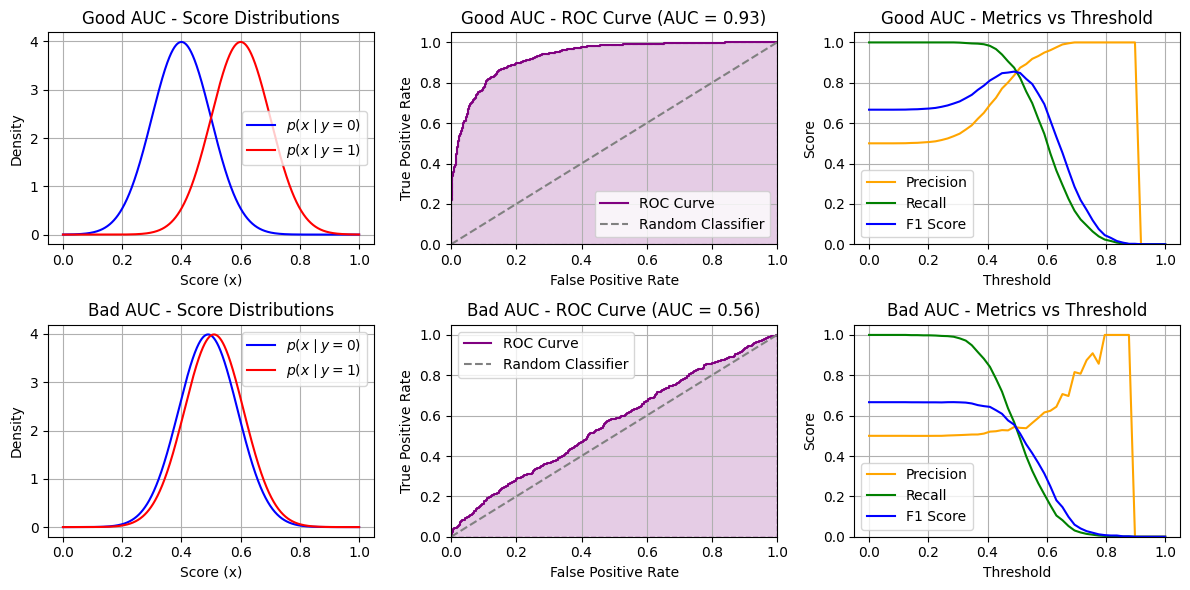

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

np.random.seed(0)

# Settings for good and bad AUC cases
cases = {
    "Good AUC": {"mu0": 0.4, "mu1": 0.6},
    "Bad AUC": {"mu0": 0.49, "mu1": 0.51}
}

# Shared parameters
sigma = 0.1
n_samples = 1000
thresholds = np.linspace(0, 1, 50)
x = np.linspace(0, 1, 1000)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

for row_idx, (label, params) in enumerate(cases.items()):
    mu0 = params["mu0"]
    mu1 = params["mu1"]

    # Generate samples
    x0 = np.random.normal(mu0, sigma, n_samples)
    x1 = np.random.normal(mu1, sigma, n_samples)
    X = np.concatenate([x0, x1])
    y_true = np.concatenate([np.zeros_like(x0), np.ones_like(x1)])

    # Calculate metrics for thresholds
    precisions, recalls, f1s = [], [], []

    for tau in thresholds:
        y_pred = (X >= tau).astype(int)
        precisions.append(precision_score(y_true, y_pred, zero_division=0))
        recalls.append(recall_score(y_true, y_pred))
        f1s.append(f1_score(y_true, y_pred, zero_division=0))

    # Plot Gaussian distributions
    ax_dist = axes[row_idx, 0]
    pdf0 = norm.pdf(x, mu0, sigma)
    pdf1 = norm.pdf(x, mu1, sigma)
    ax_dist.plot(x, pdf0, label=r'$p(x \mid y=0)$', color='blue')
    ax_dist.plot(x, pdf1, label=r'$p(x \mid y=1)$', color='red')
    ax_dist.set_title(f"{label} - Score Distributions")
    ax_dist.set_xlabel("Score (x)")
    ax_dist.set_ylabel("Density")
    ax_dist.grid(True)
    ax_dist.legend()

    # Plot ROC curve with shaded AUC area
    ax_roc = axes[row_idx, 1]
    fpr, tpr, _ = roc_curve(y_true, X)
    roc_auc = auc(fpr, tpr)
    ax_roc.plot(fpr, tpr, color='purple', label=f'ROC Curve')
    ax_roc.fill_between(fpr, 0, tpr, color='purple', alpha=0.2, linestyle='--')
    ax_roc.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    ax_roc.set_title(f"{label} - ROC Curve (AUC = {roc_auc:.2f})")
    ax_roc.set_xlabel("False Positive Rate")
    ax_roc.set_ylabel("True Positive Rate")
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.grid(True)
    ax_roc.legend()

    # Plot precision, recall, F1 vs threshold
    ax_metric = axes[row_idx, 2]
    ax_metric.plot(thresholds, precisions, label='Precision', color='orange')
    ax_metric.plot(thresholds, recalls, label='Recall', color='green')
    ax_metric.plot(thresholds, f1s, label='F1 Score', color='blue')
    ax_metric.set_title(f"{label} - Metrics vs Threshold")
    ax_metric.set_xlabel("Threshold")
    ax_metric.set_ylabel("Score")
    ax_metric.set_ylim(0, 1.05)
    ax_metric.grid(True)
    ax_metric.legend()

plt.tight_layout()
plt.show()


In the top row, we observe the behavior of a classifier with well-separated score distributions for the two classes, resulting in a high AUC. The score distributions clearly show that samples from class 0 and class 1 tend to receive distinct output values, which gives the classifier strong discriminatory power. This is reflected in the ROC curve, which rises steeply toward the top-left corner, indicating that the classifier is able to achieve high true positive rates while keeping false positive rates low across a range of thresholds. The AUC value of 0.93 confirms this visually and numerically, and the lightly shaded region under the curve reinforces the interpretation of AUC as the area beneath the ROC curve.

In the threshold-based metric plot on the right, we see how precision, recall, and F1 score vary as the decision threshold changes. Precision is low at small thresholds because the classifier is over-predicting positives, but it increases as the threshold tightens. Recall behaves in the opposite way, decreasing as the threshold increases, since fewer actual positives are detected. The F1 score peaks somewhere between, where the balance between precision and recall is optimal. The curves are smooth and well-behaved, reflecting the reliable performance of a good model not just in terms of ranking, but also in real decision-making with thresholds.

In contrast, the bottom row illustrates a model where the score distributions for both classes heavily overlap. This leads to significant ambiguity in the classifier’s output, and as expected, the ROC curve stays close to the diagonal — nearly matching a random classifier. The resulting AUC is 0.56, only slightly better than chance. This already suggests that the classifier has limited capability, and the shaded area again makes it visually clear that there's little performance advantage over randomness.

The corresponding threshold-metric plot confirms this. The precision, recall, and F1 score curves are noisy and far less stable than in the high-AUC case. At some thresholds, precision may appear high simply because the classifier is guessing very few positives, and by chance, some of those are correct. But overall, the F1 score remains low and relatively flat, indicating that no threshold provides a strong trade-off between precision and recall. This emphasizes that even if AUC provides a global sense of how well a classifier separates classes, the real-world effectiveness still depends heavily on whether a usable threshold exists — and in this low-separability case, it does not.